In [1]:
import sys
sys.path.append('../src')

In [2]:
import mesa
import seaborn as sns
import numpy as np
import pandas as pd

from boltzman import MoneyAgent, MoneyModel

In [4]:
model = MoneyModel(100, 10, 10)
for i in range(20):
    model.step()

/workspaces/mesa/.venv/lib/python3.10/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


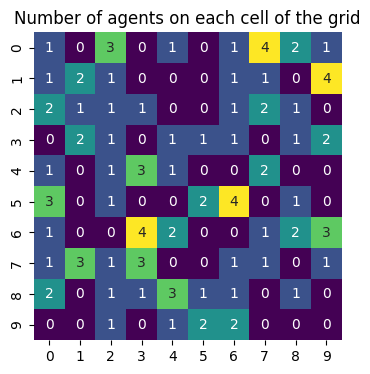

In [5]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
# Plot using seaborn, with a size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");

In [5]:
from mesa.experimental import JupyterViz

BoltzmannWealthModel = MoneyModel

def agent_portrayal(agent):
    if agent.wealth > 0:
        return { "size": 50, "color": "blue" }
    else:
        return { "size": 20, "color": "red" }

model_params = {
    "N": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}


page = JupyterViz(
    BoltzmannWealthModel,
    model_params,
    measures=["Gini"],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)

In [7]:
page

Cannot show ipywidgets in text